# This notebook examines IR satellite images in the TP region from the merged NCEP satellite product of brightness temperatures (4km, 30 min)

 Data in Netcdf format can be downloaded from: https://disc.gsfc.nasa.gov/datasets/GPM_MERGIR_V1/summary

In [1]:
# Import a range of python libraries used in this notebook:
import iris
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import urllib,zipfile
import datetime
from netCDF4 import Dataset
%matplotlib inline
import tobac

In [2]:
# extract only values above 3000 m a.s.l. 
def read_in_netcdf(file):
    dataset = Dataset(file)    
    tb= np.array(dataset["Tb"])
    lon= np.array(dataset["lon"])
    lat= np.array(dataset["lat"])
    dataset.close()
    return tb, lon, lat

In [3]:
file = '/media/juli/e718cc8f-7323-488b-b305-69b244a14f9b/julia/NCEP_IR/2007/merg_2007061115_4km-pixel.nc4'
tb, lons, lats = read_in_netcdf(file)
tbb= tb[0]
tbb[tbb < 0 ]= 9999

FileNotFoundError: [Errno 2] No such file or directory: b'/media/juli/e718cc8f-7323-488b-b305-69b244a14f9b/julia/NCEP_IR/2007/merg_2007061115_4km-pixel.nc4'

/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


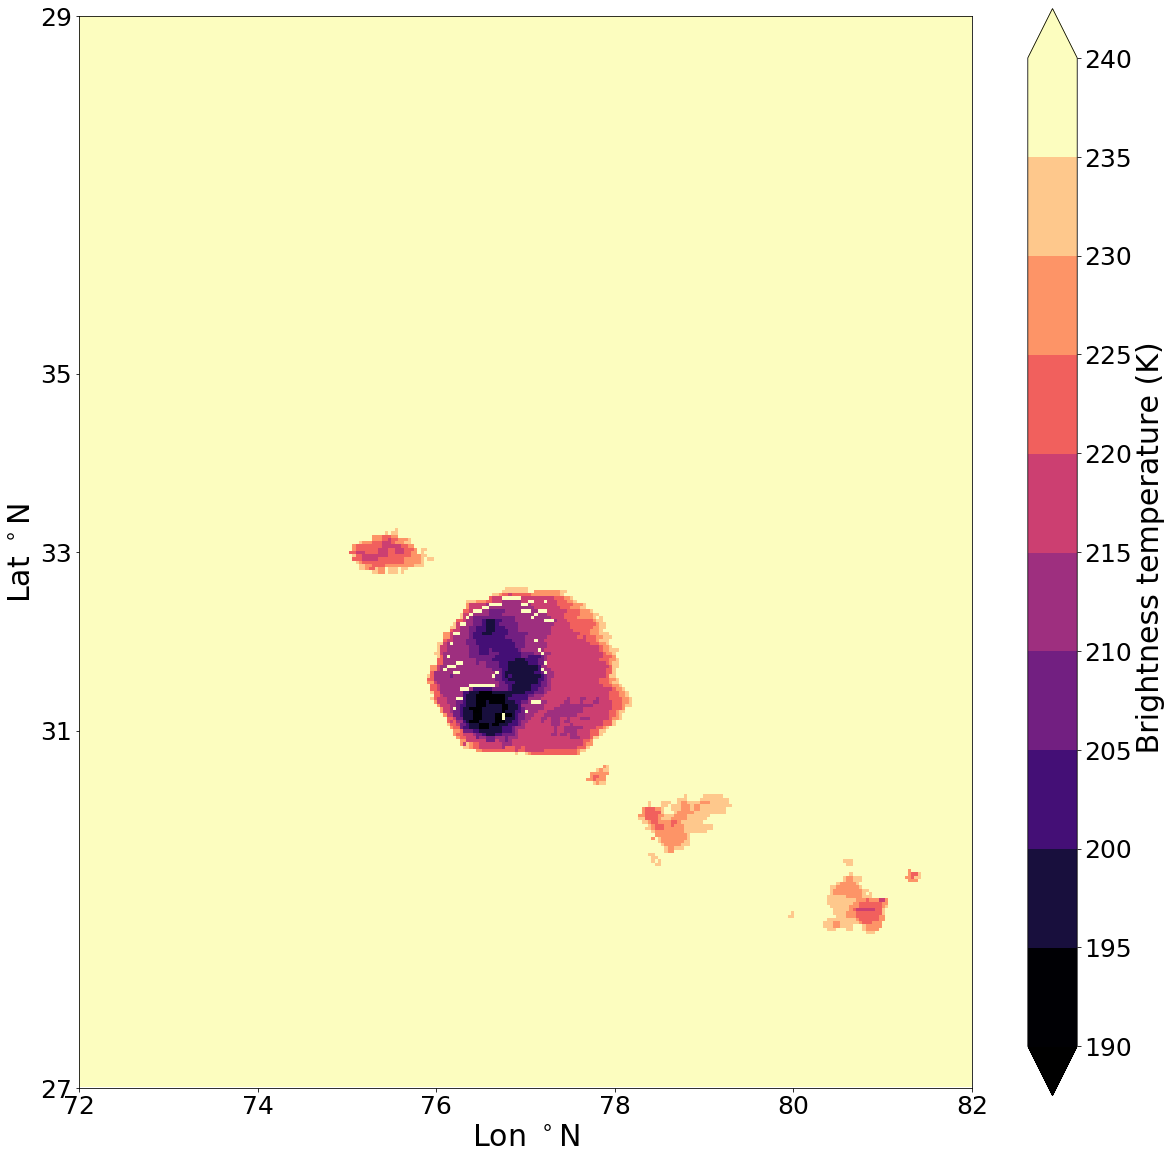

In [46]:
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors


plt.figure(figsize=(20, 20))

cmap = plt.cm.get_cmap('magma')
bounds= np.array([190, 195, 200, 205, 210, 215,220, 225, 230, 235, 240 ])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)

m = Basemap(projection='cyl', llcrnrlat=27.0,urcrnrlat=35.0, llcrnrlon=72.0, urcrnrlon=82.0,  resolution = 'c')

lon, lat =np.meshgrid(lons, lats)
xi,yi = m(lon,lat)
cs = m.pcolormesh(xi,yi, tbb,cmap=cmap, norm= norm, vmax = 240)
cmap.set_under(color='black')

xlabels=[72, 74, 76, 78, 80, 82]
ylabels= [ 27, 29, 31, 33, 35]

plt.xticks([72, 74, 76, 78, 80, 82], xlabels, fontsize=25)
plt.yticks([27,39, 31, 33, 35],ylabels, fontsize=25)
plt.xlabel('Lon $^\circ$N',  fontsize=30)
plt.ylabel('Lat $^\circ$N',  fontsize=30)

cbar = plt.colorbar(extend= 'both')
cbar.set_label(' Brightness temperature (K)', fontsize= 30)
cbar.set_ticks(bounds)
labels = ['190', '195', '200', '205', '210', '215', '220', '225','230', '235', '240' ]
cbar.set_ticklabels(labels)
plt.rcParams.update({'font.size': 25})

plt.savefig('/media/juli/Elements/comparison/ncep_example_mcc.png')



In [6]:
file = '/media/juli/e718cc8f-7323-488b-b305-69b244a14f9b/julia/NCEP_IR/2006/merg_2006060212_4km-pixel.nc4'
tb, lons, lats = read_in_netcdf(file)
tbb= tb[0]
tbb[tbb < 0 ]= 9999


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


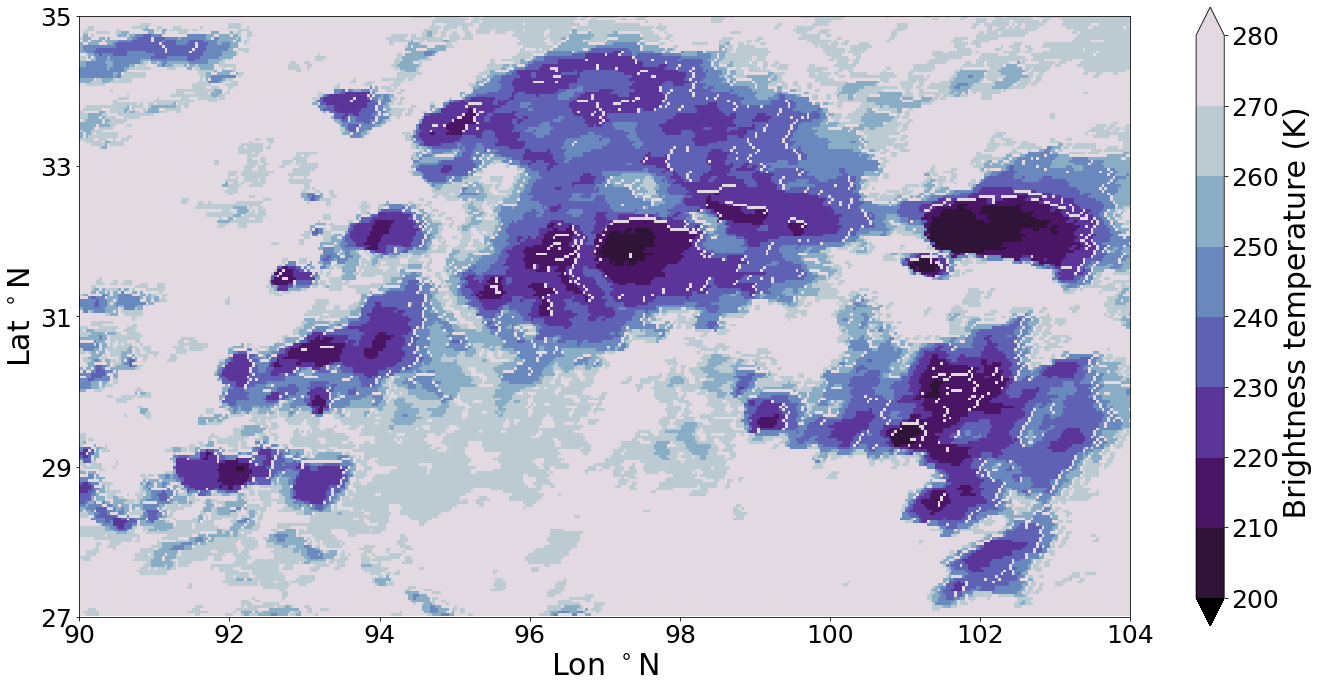

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors

plt.figure(figsize=(20, 10))

cmap = plt.cm.get_cmap('twilight_shifted')
#bounds= np.array([200, 205, 210, 215,220, 225, 230, 235, 240,245, 250 ])
bounds= np.array([200, 210, 220, 230,240,250, 260, 270, 280 ])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)

m = Basemap(projection='cyl', llcrnrlat=27.0,urcrnrlat=35.0, llcrnrlon=90.0, urcrnrlon=104.0,  resolution = 'c')

lon, lat =np.meshgrid(lons, lats)
xi,yi = m(lon,lat)
cs = m.pcolormesh(xi,yi, tbb,cmap=cmap, norm= norm)
cmap.set_under(color='black')
#cmap.set_bad(color='lightyellow')

xlabels=[90, 92, 94, 96, 98, 100, 102, 104]
ylabels= [ 27, 29, 31, 33, 35]

plt.xticks([90, 92, 94, 96, 98, 100, 102, 104], xlabels, fontsize=25)
plt.yticks([27,29, 31, 33, 35],ylabels, fontsize=25)
plt.xlabel('Lon $^\circ$N',  fontsize=30)
plt.ylabel('Lat $^\circ$N',  fontsize=30)

cbar = plt.colorbar(extend= 'both')
cbar.set_label(' Brightness temperature (K)', fontsize= 30)
#cbar.set_ticks(bounds)
#labels = [ '200', '205', '210', '215', '220', '225','230', '235', '240' ,'245', '250']
#cbar.set_ticklabels(labels)
plt.rcParams.update({'font.size': 25})
plt.tight_layout()

plt.savefig('/media/juli/Elements/comparison/ncep_example_mcc4_.png')



/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


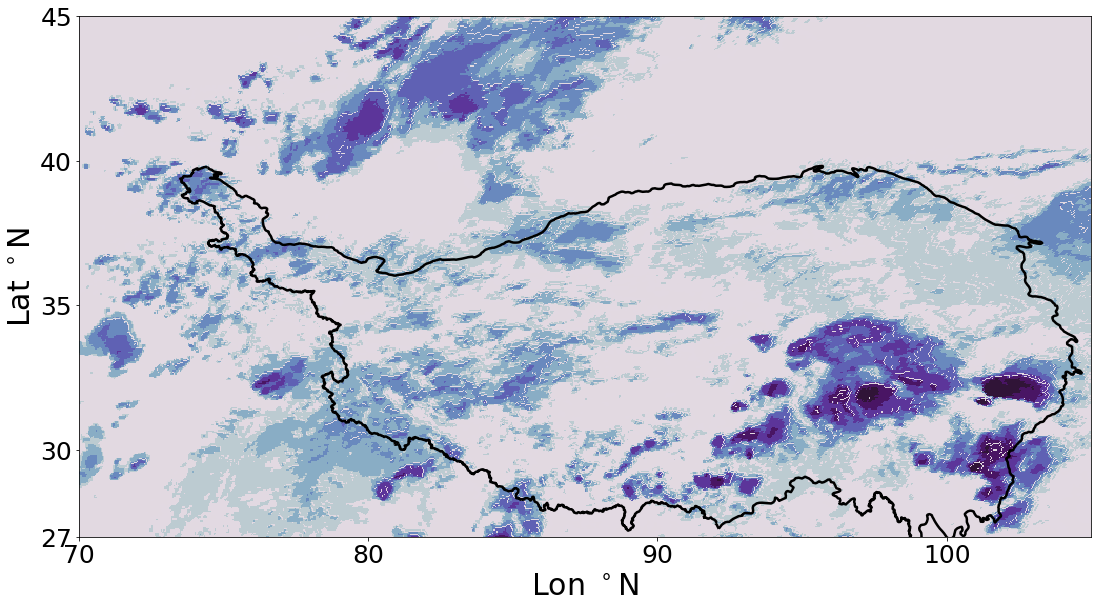

In [9]:
plt.figure(figsize=(20, 9))


#bounds= np.array([200, 205, 210, 215,220, 225, 230, 235, 240,245, 250 ])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)
cmap = plt.cm.get_cmap('twilight_shifted')

m = Basemap(projection='cyl', llcrnrlat=27.0,urcrnrlat=45.0, llcrnrlon=70.0, urcrnrlon=105.0,  resolution = 'c')

lon, lat =np.meshgrid(lons, lats)
xi,yi = m(lon,lat)
cs = m.pcolormesh(xi,yi, tbb,cmap=cmap, norm = norm)
cmap.set_under(color='black')
#cmap.set_bad(color='lightyellow')

# Plot TP boundary polyline from shapefile 
shapefile='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
TP_bound=m.readshapefile(shapefile, 'boundary', color='black', linewidth=2.5)

xlabels=[70, 80, 90, 100]
ylabels= [ 27, 30, 35, 40, 45]

plt.xticks([70, 80,90, 100], xlabels, fontsize=25)
plt.yticks([27,30, 35, 40, 45],ylabels, fontsize=25)


plt.xlabel('Lon $^\circ$N',  fontsize=30)
plt.ylabel('Lat $^\circ$N',  fontsize=30)

#cbar = plt.colorbar(extend= 'both')
#cbar.set_label(' Brightness temperature (K)', fontsize= 30)
plt.tight_layout()

plt.savefig('/media/juli/Elements/comparison/ncep_example_mcc4_extentmap_TP_NEW.png')


# Tobac tracking NCEP

In [4]:
import iris
data= '/media/juli/e718cc8f-7323-488b-b305-69b244a14f9b/julia/NCEP_IR/2008/'
data_file=(data + 'merg_200811.nc4')
tbb=iris.load_cube(data_file, 'brightness_temperature')
tbb.attributes = None # workaround for HTML iris issue (see github)
tbb


Brightness Temperature (K),time,latitude,longitude
Shape,1440,495,962
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x


In [5]:
import tobac
dxy,dt=tobac.get_spacings(tbb, grid_spacing = 4000)

Available coordinates:     ['time', 'latitude', 'longitude']


## Parameters : Features

In [6]:
# Dictionary containing keyword options (could also be directly given to the function)
parameters_features={}
parameters_features['position_threshold']='weighted_diff' # diff between specific value and threshold for weighting when finding the center location (instead of just mean lon/lat)
#parameters_features['min_num']= 241 #? 
parameters_features['min_distance']=0 # minimum distance between features 

parameters_features['sigma_threshold']=0.5 # for slightly smoothing (gaussian filter)
parameters_features['n_erosion_threshold']=0 # pixel erosion (for more robust results)

parameters_features['threshold']=[ 241, 231, 221, 211,201, 199] #mm/h, step-wise threshold for feature detection 
parameters_features['n_min_threshold']=10 # minimum nr of contiguous pixels for thresholds, 10 pixels = ca. 2000 km2
parameters_features['target']= 'minimum'

## Parameters: Segmentation

In [7]:
# Dictionary containing keyword arguments for the linking step:
parameters_linking={}

parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']= 1000 # maximum size of subnetwork used for linking 
parameters_linking['memory']=0
parameters_linking['time_cell_min']= 6*dt 
parameters_linking['method_linking']='predict'
#parameters_linking['method_detection']='threshold'
parameters_linking['v_max']= 10
#parameters_linking['d_min']=2000
parameters_linking['d_min']=4*dxy # four times the grid spacing ?

## Parameters: Tracking

In [8]:
# Dictionary containing keyword arguments for the linking step:
parameters_linking={}

parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']= 1000 # maximum size of subnetwork used for linking 
parameters_linking['memory']=0
parameters_linking['time_cell_min']= 6*dt 
parameters_linking['method_linking']='predict'
#parameters_linking['method_detection']='threshold'
parameters_linking['v_max']= 10
#parameters_linking['d_min']=2000
parameters_linking['d_min']=4*dxy # four times the grid spacing  (! seems to be important for GPM data)

## Feature detection 

In [9]:
#Set up directory to save output and plots:
savedir='Save'
os.makedirs(savedir,exist_ok=True)
plot_dir="Plot"
os.makedirs(plot_dir,exist_ok=True)

In [14]:
# Feature detection based on based on surface precipitation field and a range of thresholds
print('starting feature detection based on multiple thresholds')
Features=tobac.feature_detection_multithreshold(tbb,dxy,**parameters_features)
print('feature detection done')

#Features.to_hdf(os.path.join(savedir,'Features.h5'),'table')
print('features saved')

starting feature detection based on multiple thresholds


KeyboardInterrupt: 

## Segmentation



In [ ]:
# Perform Segmentation and save resulting mask to NetCDF file:
print('Starting segmentation based on surface precipitation')
Mask,Features_Precip=tobac.segmentation_2D(Features,Precip,dxy,**parameters_segmentation)
print('segmentation based on surface precipitation performed, start saving results to files')
iris.save([Mask],os.path.join(savedir,'Mask_Segmentation_precip.nc'),zlib=True,complevel=4)                
Features_Precip.to_hdf(os.path.join(savedir,'Features_Precip.h5'),'table')
print('segmentation surface precipitation performed and saved')

# Feature detection with chunks

# Try with 2014....

In [11]:
# get list with all files by month
import glob
file_list= glob.glob('/media/juli/e718cc8f-7323-488b-b305-69b244a14f9b/julia/NCEP_IR/2014/merg_??????.nc4')  
print('files in dataset:  ', len(file_list))
file_list.sort()


files in dataset:   12


In [ ]:
for file in file_list:
    i = file[73:79]
    print('start process for file.....', file)
    ## DATA PREPARATION
    tbb=iris.load_cube(file, 'brightness_temperature')
    tbb.attributes = None
    dxy,dt=tobac.get_spacings(tbb, grid_spacing = 4000 )
    
    # FEATURE DETECTION
    print('starting feature detection based on multiple thresholds')
    Features=tobac.feature_detection_multithreshold(tbb,dxy,**parameters_features)
    print('feature detection done')
    Features.to_hdf(os.path.join(savedir,'Features' + str(i) + '.h5'),'table')
    print('features saved')
    
    # SEGMENTATION 
    print('Starting segmentation based on surface precipitation')
    Mask,Features_Precip=tobac.segmentation_2D(Features,tbb,dxy,**parameters_segmentation)
    print('segmentation based on surface precipitation performed, start saving results to files')
    iris.save([Mask],os.path.join(savedir,'Mask_Segmentation_precip' + str(i) + '.nc'),zlib=True,complevel=4)                
    Features_Precip.to_hdf(os.path.join(savedir,'Features_Precip' + str(i) + '.h5'),'table')
    print('segmentation surface precipitation performed and saved')

start process for file..... /media/juli/e718cc8f-7323-488b-b305-69b244a14f9b/julia/NCEP_IR/2014/merg_201401.nc4
Available coordinates:     ['time', 'latitude', 'longitude']
starting feature detection based on multiple thresholds


## Tracking

In [ ]:
# Perform trajectory linking using trackpy and save the resulting DataFrame:
Track=tobac.linking_trackpy(Features,Precip,dt=dt,dxy=dxy,**parameters_linking)
Track.to_hdf(os.path.join(savedir,'Track1.h5'),'table')
